In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv("data/cleaned_data/hyderabad/hyd_properties_cleaned.csv")
df.head(3)

,property_type,bhk,area,society_name,locality,city,price_in_crore,price_per_sqft,status,new_resale,price_negotiable,age_of_property,bathrooms,carpet_area,floor,booking_amount,balconies,additional_rooms,security_deposit,furnishing_type,facing,overlooking,ownership_type,amenities,furnish_details
0,Apartment,2,1120.0,NaN,Asmangarh,Hyderabad,0.58,5178.0,Ready to move,Resale,Yes,Old Property,2.0,NaN,4.0,500000.0,1.0,pooja room,No Deposit,Semi-Furnished,North,Road View,Freehold,"Landscaped Gardens, Lift(s), Swimming Pool, Gy...",Sofa
1,Apartment,3,1905.0,Asbl Asbl Spire,Kokapet,Hyderabad,1.39,7349.0,Under Construction,New,Yes,Unknown,3.0,NaN,9.0,NaN,NaN,NaN,No Deposit,Unfurnished,NaN,NaN,Freehold,NaN,NaN
2,Independent House,10,14400.0,NaN,Banjara Hills,Hyderabad,17.47,12131.0,Ready to move,Resale,No,Unknown,11.0,14400.0,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,North,NaN,NaN,NaN,NaN


In [4]:
df.shape

(19510, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19510 entries, 0 to 19509
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_type     19510 non-null  object 
 1   bhk               19510 non-null  int64  
 2   area              19510 non-null  float64
 3   society_name      8947 non-null   object 
 4   locality          19510 non-null  object 
 5   city              19510 non-null  object 
 6   price_in_crore    19403 non-null  float64
 7   price_per_sqft    19403 non-null  float64
 8   status            19507 non-null  object 
 9   new_resale        19510 non-null  object 
 10  price_negotiable  19510 non-null  object 
 11  age_of_property   19510 non-null  object 
 12  bathrooms         17032 non-null  float64
 13  carpet_area       8459 non-null   float64
 14  floor             4479 non-null   float64
 15  booking_amount    5699 non-null   float64
 16  balconies         4698 non-null   float6

<h2 align="center" style="color:blue"> Exploratory Data Analysis</h2>

#### Check for null values

In [6]:
df.isnull().sum()

property_type           0
bhk                     0
area                    0
society_name        10563
locality                0
city                    0
price_in_crore        107
price_per_sqft        107
status                  3
new_resale              0
price_negotiable        0
age_of_property         0
bathrooms            2478
carpet_area         11051
floor               15031
booking_amount      13811
balconies           14812
additional_rooms    16027
security_deposit        0
furnishing_type         0
facing               7463
overlooking         15247
ownership_type      13010
amenities            4928
furnish_details     13676
dtype: int64

#### Handle for Duplicates

In [7]:
df.duplicated().sum()

np.int64(5595)

In [8]:
df[df.duplicated(keep=False)].sort_values(['property_type','bhk','area','society_name','locality','city'])

,property_type,bhk,area,society_name,locality,city,price_in_crore,price_per_sqft,status,new_resale,price_negotiable,age_of_property,bathrooms,carpet_area,floor,booking_amount,balconies,additional_rooms,security_deposit,furnishing_type,facing,overlooking,ownership_type,amenities,furnish_details
2449,Apartment,1,378.0,NaN,Jagadgiri Gutta,Hyderabad,0.11,2910.0,Ready to move,Resale,No,Moderately New Property,1.0,378.0,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,NaN,NaN,NaN,NaN,NaN
3767,Apartment,1,378.0,NaN,Jagadgiri Gutta,Hyderabad,0.11,2910.0,Ready to move,Resale,No,Moderately New Property,1.0,378.0,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,NaN,NaN,NaN,NaN,NaN
10917,Apartment,1,378.0,NaN,Jagadgiri Gutta,Hyderabad,0.11,2910.0,Ready to move,Resale,No,Moderately New Property,1.0,378.0,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,NaN,NaN,NaN,NaN,NaN
3701,Apartment,1,518.0,Urbanrise Spring Is In The Air,Miyapur,Hyderabad,0.29,5598.0,Under Construction,New,Yes,Unknown,1.0,388.0,4.0,200000.0,1.0,NaN,No Deposit,Unfurnished,East,"Garden View, Pool View, Road View",Freehold,"Swimming Pool, Lift(s), Sports Facility, Full ...",Wifi
5756,Apartment,1,518.0,Urbanrise Spring Is In The Air,Miyapur,Hyderabad,0.29,5598.0,Under Construction,New,Yes,Unknown,1.0,388.0,4.0,200000.0,1.0,NaN,No Deposit,Unfurnished,East,"Garden View, Pool View, Road View",Freehold,"Swimming Pool, Lift(s), Sports Facility, Full ...",Wifi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204,Villa,6,6300.0,Prathima Pristine Estates,Gopanpally,Hyderabad,21.00,33333.0,Ready to move,Resale,No,Moderately New Property,5.0,6300.0,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,East,NaN,NaN,"Gymnasium, Lift(s), Swimming Pool, Full Power ...",NaN
12196,Villa,6,6300.0,Prathima Pristine Estates,Gopanpally,Hyderabad,21.00,33333.0,Ready to move,Resale,No,Moderately New Property,5.0,6300.0,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,East,NaN,NaN,"Gymnasium, Lift(s), Swimming Pool, Full Power ...",NaN
1179,Villa,6,7200.0,NaN,Gandipet,Hyderabad,14.50,20138.0,Ready to move,Resale,Yes,New Property,6.0,NaN,NaN,1000000.0,1.0,pooja room,No Deposit,Unfurnished,East,Garden View,Freehold,"Landscaped Gardens, Lift(s), Swimming Pool, Gy...",Sofa
7698,Villa,6,7200.0,NaN,Gandipet,Hyderabad,14.50,20138.0,Ready to move,Resale,Yes,New Property,6.0,NaN,NaN,1000000.0,1.0,pooja room,No Deposit,Unfurnished,East,Garden View,Freehold,"Landscaped Gardens, Lift(s), Swimming Pool, Gy...",Sofa


In [9]:
df1 = df.drop_duplicates()
df1.head(3)

,property_type,bhk,area,society_name,locality,city,price_in_crore,price_per_sqft,status,new_resale,price_negotiable,age_of_property,bathrooms,carpet_area,floor,booking_amount,balconies,additional_rooms,security_deposit,furnishing_type,facing,overlooking,ownership_type,amenities,furnish_details
0,Apartment,2,1120.0,NaN,Asmangarh,Hyderabad,0.58,5178.0,Ready to move,Resale,Yes,Old Property,2.0,NaN,4.0,500000.0,1.0,pooja room,No Deposit,Semi-Furnished,North,Road View,Freehold,"Landscaped Gardens, Lift(s), Swimming Pool, Gy...",Sofa
1,Apartment,3,1905.0,Asbl Asbl Spire,Kokapet,Hyderabad,1.39,7349.0,Under Construction,New,Yes,Unknown,3.0,NaN,9.0,NaN,NaN,NaN,No Deposit,Unfurnished,NaN,NaN,Freehold,NaN,NaN
2,Independent House,10,14400.0,NaN,Banjara Hills,Hyderabad,17.47,12131.0,Ready to move,Resale,No,Unknown,11.0,14400.0,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,North,NaN,NaN,NaN,NaN


In [10]:
df1.shape

(13915, 25)

In [11]:
df1.describe()

,bhk,area,price_in_crore,price_per_sqft,bathrooms,carpet_area,floor,booking_amount,balconies
count,13915.000000,13915.000000,13831.000000,13831.000000,12160.000000,6.257000e+03,3018.000000,3.577000e+03,2861.000000
mean,2.854761,1973.600791,1.579204,7034.477044,2.771217,2.080039e+03,5.612326,4.945527e+05,1.424677
std,0.940346,1208.917239,2.186334,4563.403136,1.013501,2.807868e+04,6.137320,5.589651e+05,0.672907
min,1.000000,200.000000,0.090000,787.000000,1.000000,2.000000e+01,0.000000,1.000000e+00,1.000000
25%,2.000000,1215.000000,0.670000,4998.000000,2.000000,1.000000e+03,2.000000,2.000000e+05,1.000000
50%,3.000000,1600.000000,0.950000,6185.000000,3.000000,1.300000e+03,4.000000,5.000000e+05,1.000000
75%,3.000000,2215.000000,1.610000,7621.000000,3.000000,1.850000e+03,7.000000,5.000000e+05,2.000000
max,12.000000,15825.000000,50.000000,135135.000000,12.000000,2.200165e+06,48.000000,1.200000e+07,6.000000


In [12]:
df1.columns

Index(['property_type', 'bhk', 'area', 'society_name', 'locality', 'city',
       'price_in_crore', 'price_per_sqft', 'status', 'new_resale',
       'price_negotiable', 'age_of_property', 'bathrooms', 'carpet_area',
       'floor', 'booking_amount', 'balconies', 'additional_rooms',
       'security_deposit', 'furnishing_type', 'facing', 'overlooking',
       'ownership_type', 'amenities', 'furnish_details'],
      dtype='object')

In [13]:
plt.rcParams['figure.figsize'] = [5, 3] 

#### property_type

<Axes: xlabel='property_type'>

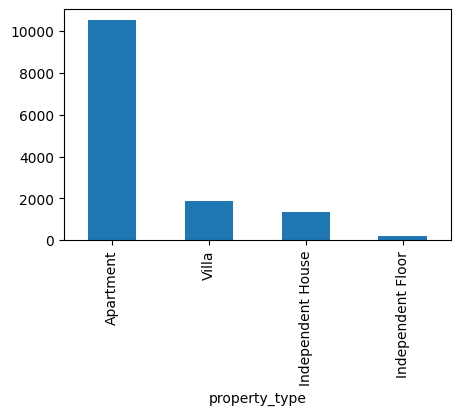

In [14]:
df1['property_type'].value_counts().plot(kind='bar')

##### Observations
- Flats are in majority(75 percent) and there are less number of houses(25 percent)
- No missing values

#### bhk

In [15]:
df1['bhk'].isnull().sum()

np.int64(0)

<Axes: xlabel='bhk'>

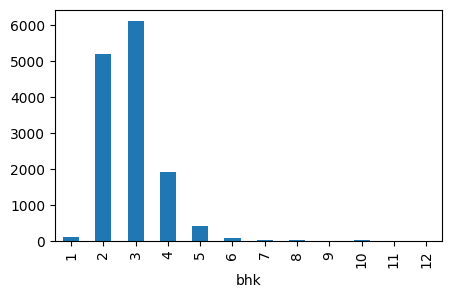

In [16]:
df1['bhk'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

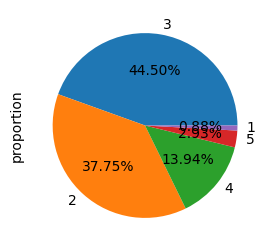

In [17]:
df1['bhk'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

##### Observations
- Most of the properties lie between 2, 3, 4, 5 bhk.
- 3 bhk being the most frequent
- No missing values.

#### area

In [18]:
df1['area'].isnull().sum()

np.int64(0)

In [19]:
df1['area'].describe()

count    13915.000000
mean      1973.600791
std       1208.917239
min        200.000000
25%       1215.000000
50%       1600.000000
75%       2215.000000
max      15825.000000
Name: area, dtype: float64

<Axes: xlabel='area', ylabel='Count'>

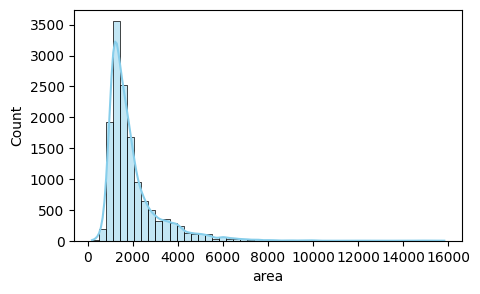

In [20]:
sns.histplot(df1['area'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='area'>

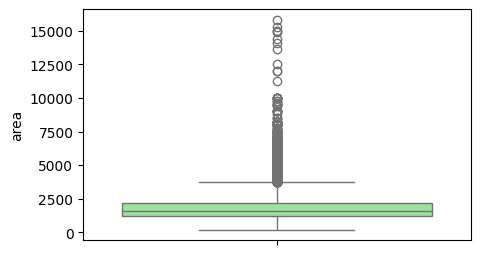

In [21]:
sns.boxplot(df1['area'], color='lightgreen')

##### Observations
- Most of the properties have a area of ranging between approximately 1,000 sq.ft and 2,200 sq.ft.
- There are few properties with a significantly larger area, leading to a right skewed didtribution.
- The interquartile range (IQR) lies between roughly 1,215 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper whisker of the box plot, indicating potential outliers. There are properties with an unusally larger area

#### society_name

In [22]:
df1['society_name'].isnull().sum()

np.int64(7247)

In [23]:
df1['society_name'].value_counts().shape

(1484,)

In [24]:
society_counts = df['society_name'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': np.int64(2),
 'High (50-100)': np.int64(18),
 'Average (10-49)': np.int64(238),
 'Low (2-9)': np.int64(652),
 'Very Low (1)': np.int64(574)}

<Axes: xlabel='society_name'>

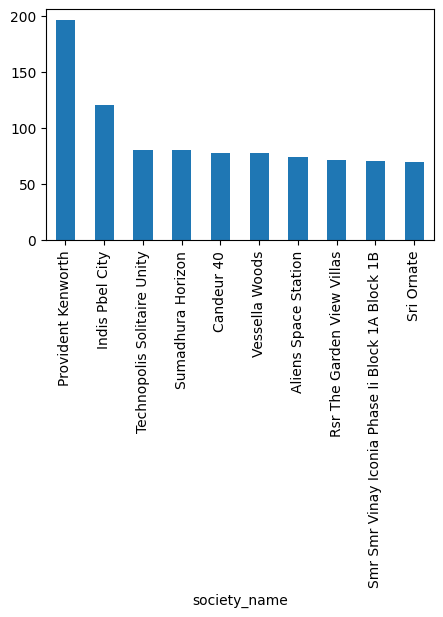

In [25]:
# top 10 socities
df['society_name'].value_counts().head(10).plot(kind='bar')

##### Observations
- There are 1484 societies.
- Very High (>100): Only 2 society has more than 100 listings.
- High (50-100): 18 societies have between 50 to 100 listings.
- Average (10-49): 238 societies fall in this range with 10 to 49 listings each.
- Low (2-9): 652 societies have between 2 to 9 listings.
- Very Low (1): A significant number, 574 societies, have only 1 listing.
- 7238 missing values

#### locality

In [26]:
df1['locality'].isnull().sum()

np.int64(0)

In [27]:
df1['locality'].value_counts().shape

(726,)

<Axes: xlabel='locality'>

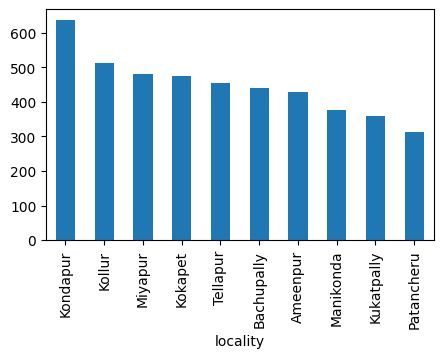

In [28]:
# Top 10 localities
df1['locality'].value_counts().head(10).plot(kind='bar')

In [29]:
# Frequency distribution for sectors
locality_counts = df1['locality'].value_counts()

locality_counts = {
    "Very High (>100)": (locality_counts > 100).sum(),
    "High (50-100)": ((locality_counts >= 50) & (locality_counts <= 100)).sum(),
    "Average (10-49)": ((locality_counts >= 10) & (locality_counts < 50)).sum(),
    "Low (2-9)": ((locality_counts > 1) & (locality_counts < 10)).sum(),
    "Very Low (1)": (locality_counts == 1).sum()
}

locality_counts

{'Very High (>100)': np.int64(30),
 'High (50-100)': np.int64(38),
 'Average (10-49)': np.int64(100),
 'Low (2-9)': np.int64(224),
 'Very Low (1)': np.int64(334)}

##### Observations
- There are total of 726 unique localities in the dataset.
- Frequency distribution of localities:
    - Very High (>100): 30 localities have more than 100 listings.
    - High (50-100): 38 localities have between 50 to 100 listings.
    - Average (10-49): A majority, 100 localities, fall in this range with 10 to 49 listings each.
    - Low (2-9): 223 localities have between 2 to 9 listings.
    - Very Low (1): 335 localities have 1 listings.
- No missing values

#### city

In [30]:
df1['city'].isnull().sum()

np.int64(0)

<Axes: xlabel='city'>

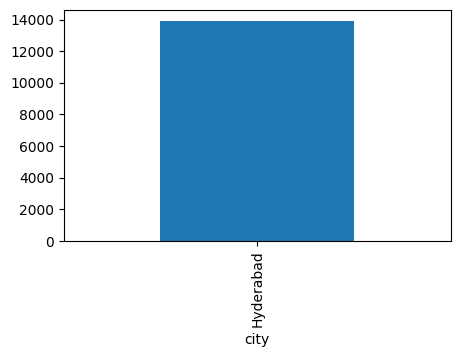

In [31]:
df1['city'].value_counts().plot(kind='bar')

#### price_in_crore

In [32]:
df1['price_in_crore'].isnull().sum()

np.int64(84)

In [33]:
df1['price_in_crore'].describe()

count    13831.000000
mean         1.579204
std          2.186334
min          0.090000
25%          0.670000
50%          0.950000
75%          1.610000
max         50.000000
Name: price_in_crore, dtype: float64

<Axes: xlabel='price_in_crore', ylabel='Count'>

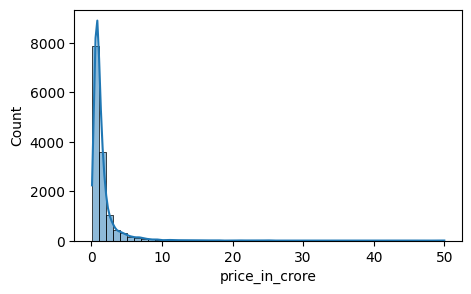

In [34]:
sns.histplot(df1['price_in_crore'], kde=True, bins=50)

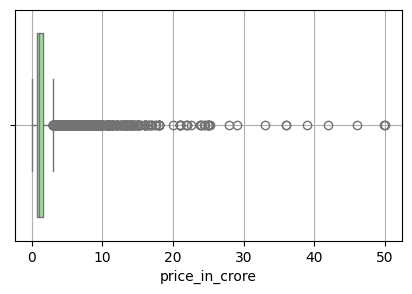

In [35]:
sns.boxplot(x=df1['price_in_crore'], color='lightgreen')
plt.grid()

##### Observations
- Descriptive Statistics:
    - Count: There are 13,816 non-missing price entries.
    - Mean Price: The average price is approximately 1.57 crores.
    - Median Price: The median (or 50th percentile) price is 0.95 crores.
    - Standard Deviation: The prices have a standard deviation of 2.18, indicating variability in the prices.
    - Range: Prices range from a minimum of 0.00 crores to a maximum of 50 crores.
    - IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.67 crores to 1.61 crores.
- Visualizations:
    - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
    - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
- Missing Values: There are 84 missing values in the price column.

#### price_per_sqft

In [37]:
df1['price_per_sqft'].isnull().sum()

np.int64(84)

In [38]:
df1['price_per_sqft'].describe()

count     13831.000000
mean       7034.477044
std        4563.403136
min         787.000000
25%        4998.000000
50%        6185.000000
75%        7621.000000
max      135135.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

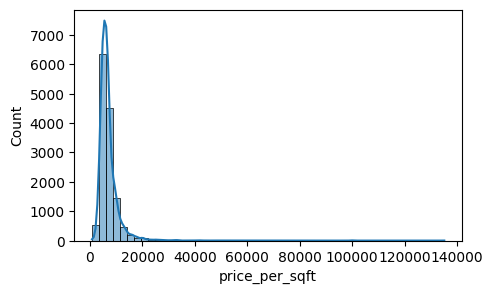

In [39]:
sns.histplot(df1['price_per_sqft'], kde=True, bins=50)

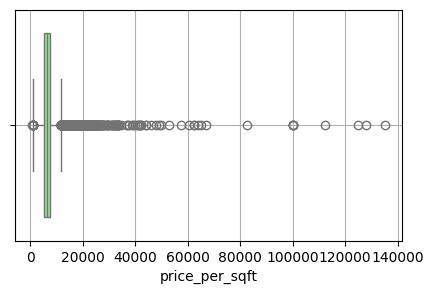

In [40]:
sns.boxplot(x=df1['price_per_sqft'], color='lightgreen')
plt.grid()

##### Observations
- Count: There are 13,831 non-missing price entries.
- Mean Price: The average price is approximately 7034.47.
- Median Price: The median (or 50th percentile) price is 6185.
- Standard Deviation: The prices have a standard deviation of 4563.40, indicating variability in the prices.
- Range: Prices range from a minimum of 787 to a maximum of 135135.
- IQR: The interquartile range (difference between 75th and 25th percentile) is from 7621 to 4998.

#### status

In [41]:
df1['status'].isnull().sum()

np.int64(2)

<Axes: xlabel='status'>

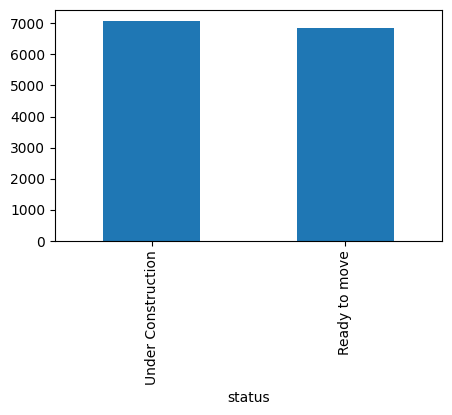

In [43]:
df1['status'].value_counts().plot(kind='bar')

#### new_resale

In [44]:
df1['new_resale'].isnull().sum()

np.int64(0)

<Axes: xlabel='new_resale'>

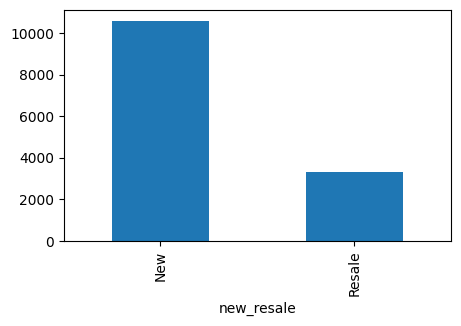

In [45]:
df1['new_resale'].value_counts().plot(kind='bar')

#### price_negotiable

In [46]:
df1['price_negotiable'].isnull().sum()

np.int64(0)

<Axes: xlabel='price_negotiable'>

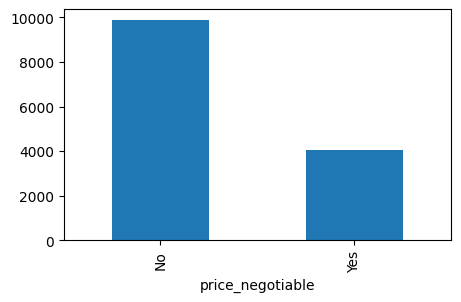

In [47]:
df1['price_negotiable'].value_counts().plot(kind='bar')

#### age_of_property

In [48]:
df1['age_of_property'].isnull().sum()

np.int64(0)

<Axes: xlabel='age_of_property'>

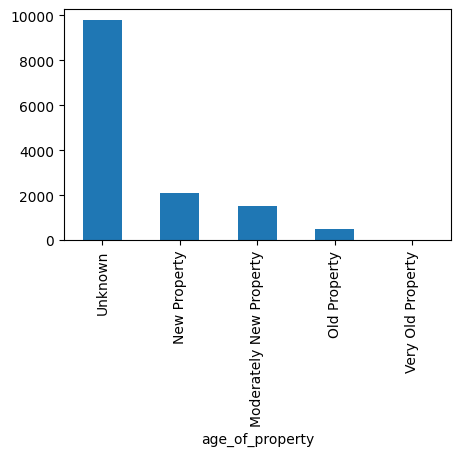

In [49]:
df1['age_of_property'].value_counts().plot(kind='bar')

#### bathrooms

In [50]:
df1['bathrooms'].isnull().sum()

np.int64(1755)

<Axes: xlabel='bathrooms'>

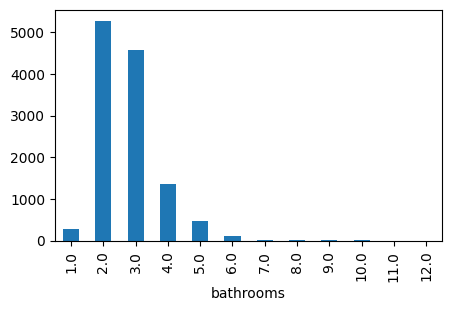

In [51]:
df1['bathrooms'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

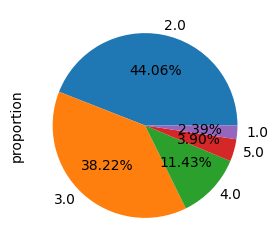

In [52]:
df1['bathrooms'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

##### Observations
- Most of the properties have 2,3,4 bathrooms.
- 2 bathrooms being the most frequent.
- 1755 missing values.

#### carpet_area

In [53]:
df1['carpet_area'].isnull().sum()

np.int64(7658)

In [58]:
df1['carpet_area'].describe()

count      6257.00
mean       2080.04
std       28078.68
min          20.00
25%        1000.00
50%        1300.00
75%        1850.00
max     2200165.00
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

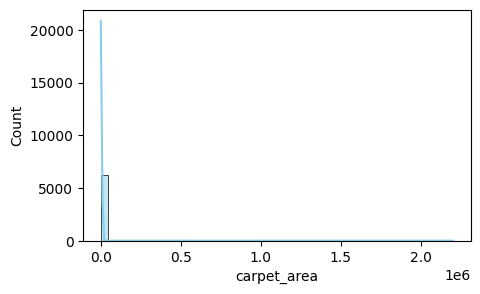

In [54]:
sns.histplot(df1['carpet_area'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='carpet_area'>

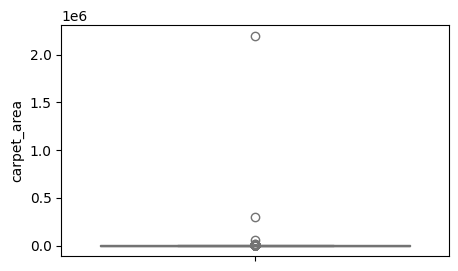

In [55]:
sns.boxplot(df1['carpet_area'], color='lightgreen')

#### floor

In [59]:
df1['floor'].isnull().sum()

np.int64(10897)

<Axes: xlabel='floor'>

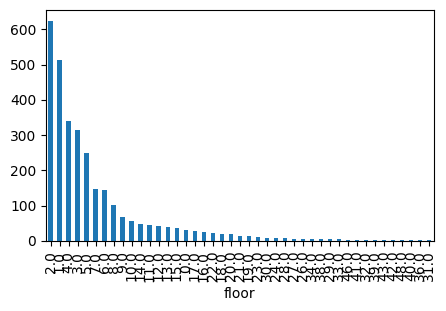

In [61]:
df1['floor'].value_counts().plot(kind='bar')

### balconies

In [62]:
df1['balconies'].isnull().sum()

np.int64(11054)

<Axes: xlabel='balconies'>

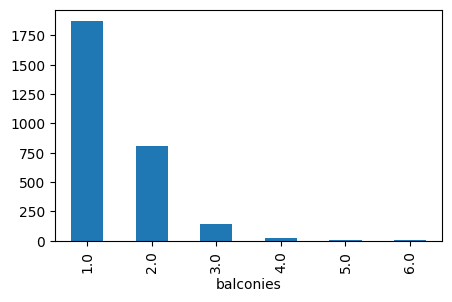

In [64]:
df1['balconies'].value_counts().plot(kind='bar')

#### additional_rooms

In [65]:
df1['additional_rooms'].isnull().sum()

np.int64(11671)

In [66]:
df1['additional_rooms'].value_counts()

additional_rooms
pooja room                              1645
study room, servant room, pooja room     239
study room                               178
servant room, pooja room                  72
study room, pooja room                    60
servant room                              42
study room, servant room                   8
Name: count, dtype: int64

#### furnishing_type

In [68]:
df1['furnishing_type'].isnull().sum()

np.int64(0)

<Axes: xlabel='furnishing_type'>

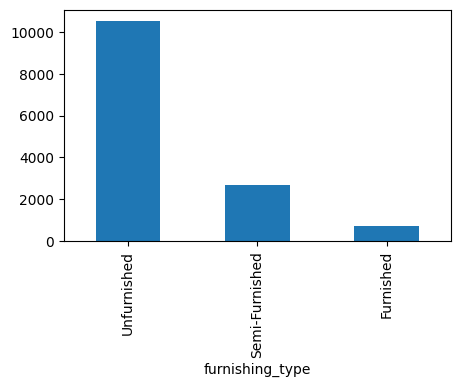

In [69]:
df1['furnishing_type'].value_counts().plot(kind='bar')

#### facing

In [70]:
df1['facing'].isnull().sum()

np.int64(5289)

<Axes: xlabel='facing'>

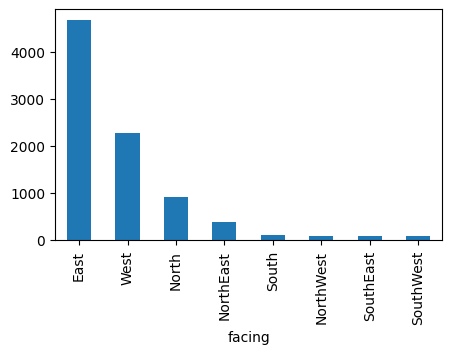

In [72]:
df1['facing'].value_counts().plot(kind='bar')

In [74]:
numeric_columns = ['bhk', 'area', 'price_per_sqft', 'bathrooms',
       'carpet_area', 'floor', 'booking_amount', 'balconies']
numeric_columns

['bhk',
 'area',
 'price_per_sqft',
 'bathrooms',
 'carpet_area',
 'floor',
 'booking_amount',
 'balconies']

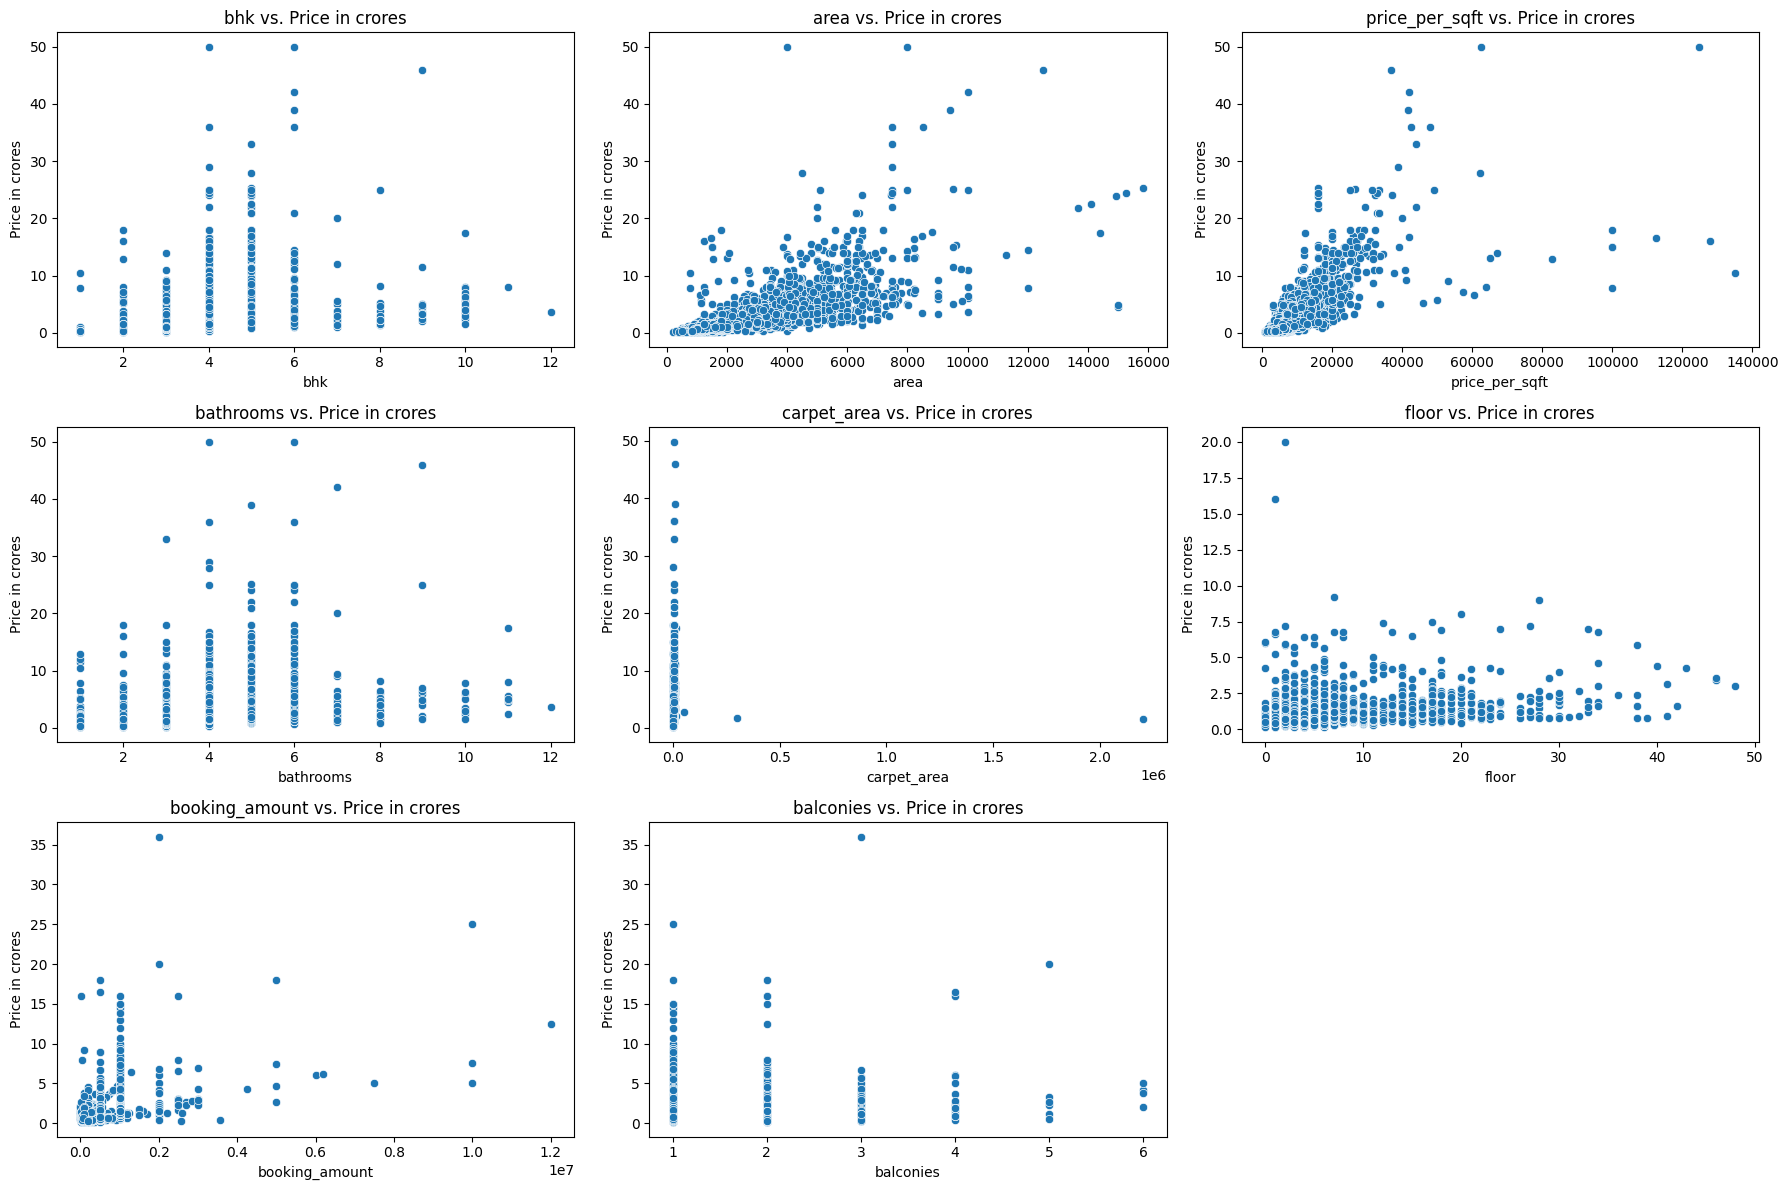

In [76]:
import math

n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

axes = axes.flatten()

for i, (ax, column) in enumerate(zip(axes, numeric_columns)):
    sns.scatterplot(x=df1[column], y=df1['price_in_crore'], ax=ax)
    ax.set_title(f"{column} vs. Price in crores")
    ax.set_xlabel(column)
    ax.set_ylabel('Price in crores')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()